# Data Mangement and Mining - Group Assessment

### Assessment Instructions: Analysing, Processing, and Modeling Financial Transaction Data

Your team has been given access to a dataset containing financial transaction data. Your goal is to analyze, process, and model this data to identify patterns, trends, and potential fraud.Once completed you will need to submit this notebook and an accompanying model file for assessment (See Assessment Brief Section 2 Part 1). Once an initial submission has been made groups should focus on improving the model and the analysis, then resubmit the updated notebook and model file (See Assessment Brief section 2 Part 2). The final submission should also include a short reflective summary, outlining the changes made and the reasons for these changes (See assessment brief Section 2 Part 2).

### Assessment Dataset

The dataset provided for the assessment contains a sample of financial transactions, made by customers. The features of the dataset are described below, they mainly include information about the transaction and the customer involved in the transaction. The dataset also contains a binary target variable called 'Is.Fraudulent', which indicates whether the transaction is fraudulent or not. The goal of the assessment is to build a model that can predict whether a transaction is fraudulent or not based on the features provided in the dataset and any additional features that you may create.

| Variable          | Data Type     | Description             |
|-------------------|---------------|-------------------------|
| Transaction.Date   | object        | The date of the transaction. |
| Transaction.Amount | float64       | The amount of money involved. |
| Customer.Age      | int64         | The age of the customer.    |
| Account.Age.Days  | int64         | The number of days since opened. |
| Transaction.Hour  | int64         | The hour of day during transaction. |
| source            | object        | The source of the transaction.|
| browser           | object        | The browser used for transaction.|
| Payment.Method   | object        | The payment method used.    |
| Product.Category | object        | The category of product purchased.|
| Quantity          | int64         | The number of units purchased.|
| Device.Used       | object        | The device used to make transaction.|
| Is.Fraudulent     | int64         | A flag indicating fraudulent status.|


### Assessment Template

The template provided below is a guide to help you structure your analysis. You can add additional code and text cells to the template as needed. There are cells and code throughout the template which you should not modify, these are required to ensure the assessment can be marked successfully. The cells or code you should not modify will be clearly labeled. Please ensure you save a copy of the template to your local machine before you start your analysis.

### Assessment Submission

# **Data Loading**

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Load data
file_path = 'student_dataset.csv'
df = pd.read_csv(file_path, encoding='latin1')

# View data
print(df.head())

      Transaction.Date  Transaction.Amount  Customer.Age  Account.Age.Days  \
0  2015-05-28 11:15:16               45.00            37                35   
1  2015-04-03 03:39:44               15.00            33                44   
2  2015-08-31 23:01:21               54.00            19                44   
3  2024-03-10 17:02:40              234.42            23               107   
4  2024-03-30 08:15:29              412.49            23               220   

   Transaction.Hour  source  browser Payment.Method Product.Category  \
0                11     Ads   Chrome         PayPal      electronics   
1                 3  Direct  FireFox     debit card  health & beauty   
2                23     SEO    Opera     debit card  health & beauty   
3                17     Ads   Chrome  bank transfer      electronics   
4                 8     Ads   Safari  bank transfer     toys & games   

   Quantity Device.Used  Is.Fraudulent  
0         5      tablet              0  
1         5     

# **Data Preprocessing**

In [3]:
# continue to analyze the data
# Check for data types and missing values
df.info()

print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction.Date    240000 non-null  object 
 1   Transaction.Amount  240000 non-null  float64
 2   Customer.Age        240000 non-null  int64  
 3   Account.Age.Days    240000 non-null  int64  
 4   Transaction.Hour    240000 non-null  int64  
 5   source              240000 non-null  object 
 6   browser             240000 non-null  object 
 7   Payment.Method      240000 non-null  object 
 8   Product.Category    240000 non-null  object 
 9   Quantity            240000 non-null  int64  
 10  Device.Used         240000 non-null  object 
 11  Is.Fraudulent       240000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 22.0+ MB
(240000, 12)


In [4]:
# Remove whitespace in text columns
text_columns = ['source', 'browser', 'Payment.Method', 'Product.Category', 'Device.Used']
for col in text_columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [5]:
# Change data type of categorical columns
category_mapping = {col: sorted(df[col].unique()) for col in text_columns}
for column, categories in category_mapping.items():
    df[column] = pd.Categorical(df[column], categories=categories, ordered=True)

In [6]:
# Check updated data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Transaction.Date    240000 non-null  object  
 1   Transaction.Amount  240000 non-null  float64 
 2   Customer.Age        240000 non-null  int64   
 3   Account.Age.Days    240000 non-null  int64   
 4   Transaction.Hour    240000 non-null  int64   
 5   source              240000 non-null  category
 6   browser             240000 non-null  category
 7   Payment.Method      240000 non-null  category
 8   Product.Category    240000 non-null  category
 9   Quantity            240000 non-null  int64   
 10  Device.Used         240000 non-null  category
 11  Is.Fraudulent       240000 non-null  int64   
dtypes: category(5), float64(1), int64(5), object(1)
memory usage: 14.0+ MB


In [7]:
# Change the data type of the 'Transaction.Date' column to date
df['Transaction.Date'] = pd.to_datetime(df['Transaction.Date'], format='mixed')
df['Transaction.Date'] = df['Transaction.Date'].dt.strftime('%Y-%m-%d')

In [8]:
# Check for summary statistics
print(df.describe())

       Transaction.Amount   Customer.Age  Account.Age.Days  Transaction.Hour  \
count       240000.000000  240000.000000     240000.000000     240000.000000   
mean           132.143547      33.834617        117.843075         11.414671   
std            213.518929       9.393592        100.604279          6.947764   
min              9.000000      -8.000000          0.000000          0.000000   
25%             30.000000      27.000000         40.000000          5.000000   
50%             53.000000      33.000000         87.000000         11.000000   
75%            152.740000      40.000000        178.000000         17.000000   
max           8329.900000      79.000000        365.000000         23.000000   

            Quantity  Is.Fraudulent  
count  240000.000000  240000.000000  
mean        3.005296       0.072008  
std         1.415310       0.258502  
min         1.000000       0.000000  
25%         2.000000       0.000000  
50%         3.000000       0.000000  
75%         4

In [9]:
# Change the negative values in the age column to the median age
median_age = df[df['Customer.Age'] >= 0]['Customer.Age'].median()
df.loc[df['Customer.Age'] < 0, 'Customer.Age'] = median_age

In [10]:
# Check for missing values
if df.isnull().sum().sum() == 0:
    print("No missing values in the dataset")
else:
    # Fill missing values in the 'Transaction.Amount' column with the median amount
    df['Transaction.Amount'].fillna(df['Transaction.Amount'].median(), inplace=True)

    # Fill missing values in the categorical columns with the mode value
    categorical_cols = ["source", "browser", "Payment.Method", "Product.Category", "Device.Used"]
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    # Fill missing values in the 'Is.Fraudulent' column with the mode value
    df['Is.Fraudulent'].fillna(df['Is.Fraudulent'].mode()[0], inplace=True)

No missing values in the dataset


In [11]:
# Updated dataset summary statistics
print(df.describe())
print(df.shape)

       Transaction.Amount   Customer.Age  Account.Age.Days  Transaction.Hour  \
count       240000.000000  240000.000000     240000.000000     240000.000000   
mean           132.143547      33.837750        117.843075         11.414671   
std            213.518929       9.387322        100.604279          6.947764   
min              9.000000       0.000000          0.000000          0.000000   
25%             30.000000      27.000000         40.000000          5.000000   
50%             53.000000      33.000000         87.000000         11.000000   
75%            152.740000      40.000000        178.000000         17.000000   
max           8329.900000      79.000000        365.000000         23.000000   

            Quantity  Is.Fraudulent  
count  240000.000000  240000.000000  
mean        3.005296       0.072008  
std         1.415310       0.258502  
min         1.000000       0.000000  
25%         2.000000       0.000000  
50%         3.000000       0.000000  
75%         4

# **Feature Engineering**

In [12]:
# Ensure 'Transaction.Date' is in datetime format
df['Transaction.Date'] = pd.to_datetime(df['Transaction.Date'], format='%Y-%m-%d', errors='coerce')
# Extract useful time-based features
df["Transaction.Year"] = df["Transaction.Date"].dt.year
df["Transaction.Month"] = df["Transaction.Date"].dt.month
df["Transaction.Day"] = df["Transaction.Date"].dt.day
df["Transaction.Weekday"] = df["Transaction.Date"].dt.weekday
df["Transaction.Week"] = df["Transaction.Date"].dt.isocalendar().week  #Extracting week of the year for seasonal analysis
df["Transaction.Week"] = df["Transaction.Week"].astype(int) # Convert 'Transaction.Week' to int data type
df["Transaction.DayOfYear"] = df["Transaction.Date"].dt.dayofyear  #Extracting day of the year for capturinng annual trends such as holiday shopping

# Create holiday feature to flag if transaction happened on public holiday
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=df["Transaction.Date"].min(), end=df["Transaction.Date"].max())
df["Is_Holiday"] = df["Transaction.Date"].isin(holidays).astype(int)

# Create a Boolean feature to determine the presence of weekends through the weekday raw data
df['is_weekend'] = df['Transaction.Weekday'].apply(lambda x: 1 if x in [5, 6] else 0)

# Create season encoding
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"
df["Transaction.Season"] = df["Transaction.Month"].apply(assign_season)

# Flag Transactions at Unusual Hours
df['Is_Night_Transaction'] = df['Transaction.Hour'].apply(lambda x: 1 if (x < 6 or x > 22) else 0)

# Transaction Hour Binning (Morning, Afternoon, Evening, Night)
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['Transaction_Period'] = pd.cut(df['Transaction.Hour'], bins=bins, labels=labels, right=False)

# Drop the original date column
df.drop(columns=["Transaction.Date"], inplace=True)

df.head()

,Transaction.Amount,Customer.Age,Account.Age.Days,Transaction.Hour,source,browser,Payment.Method,Product.Category,Quantity,Device.Used,...,Transaction.Month,Transaction.Day,Transaction.Weekday,Transaction.Week,Transaction.DayOfYear,Is_Holiday,is_weekend,Transaction.Season,Is_Night_Transaction,Transaction_Period
0,45.00,37,35,11,ads,chrome,paypal,electronics,5,tablet,...,5,28,3,22,148,0,0,Spring,0,Morning
1,15.00,33,44,3,direct,firefox,debit card,health & beauty,5,tablet,...,4,3,4,14,93,0,0,Spring,1,Night
2,54.00,19,44,23,seo,opera,debit card,health & beauty,1,mobile,...,8,31,0,36,243,0,0,Summer,1,Evening
3,234.42,23,107,17,ads,chrome,bank transfer,electronics,5,tablet,...,3,10,6,10,70,0,1,Spring,0,Afternoon
4,412.49,23,220,8,ads,safari,bank transfer,toys & games,4,mobile,...,3,30,5,13,90,0,1,Spring,0,Morning


 **Exploratory Data Analysis**

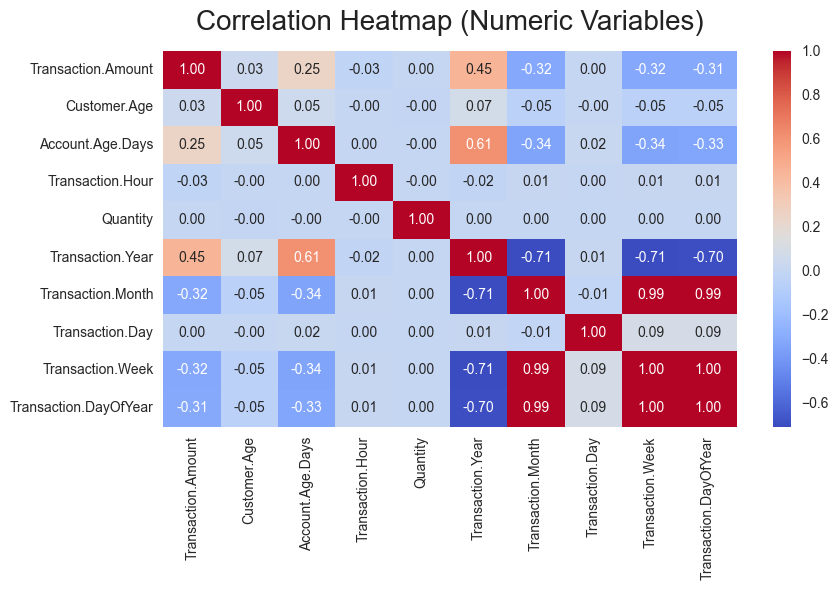

In [13]:
# Convert columns to appropriate numeric types if possible
numeric_cols = ['Transaction.Amount', 'Customer.Age', 'Account.Age.Days', 'Transaction.Hour', 'Quantity', 'Transaction.Year', 'Transaction.Month', 'Transaction.Day', 'Transaction.Week', 'Transaction.DayOfYear']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot 1: Correlation heatmap for numeric variables
plt.style.use('seaborn-v0_8')
num_df = df[numeric_cols].dropna()
plt.figure(figsize=(9,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Variables)', pad=15, fontsize=20, color='#222222')
plt.tight_layout()
plt.show()

The correlation heatmap shows relationships between numeric variables. There's a moderate positive correlation between Transaction Year and Account Age Days.


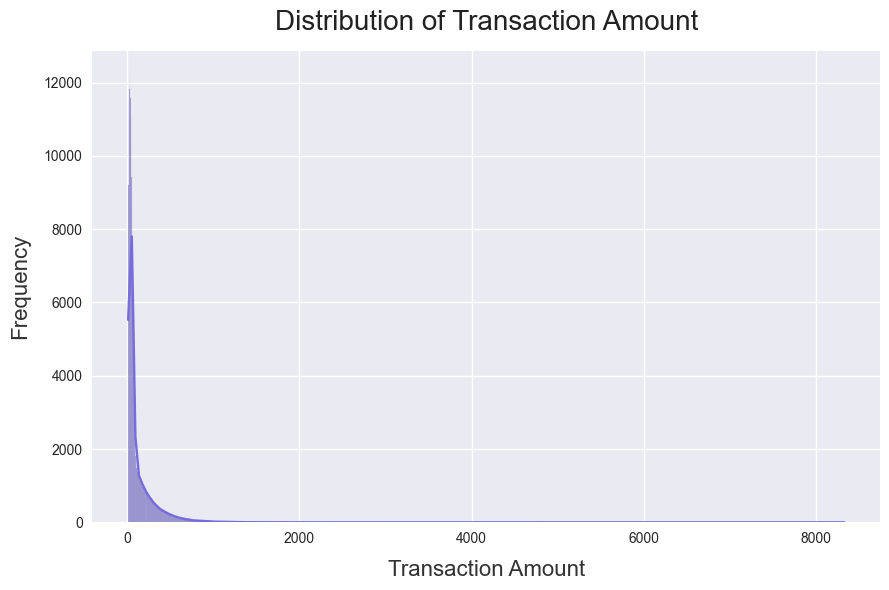

In [14]:
# Plot 2: Histogram for Transaction.Amount
plt.figure(figsize=(9,6))
sns.histplot(df['Transaction.Amount'].dropna(), kde=True, color='#766CDB')
plt.title('Distribution of Transaction Amount', pad=15, fontsize=20, color='#222222')
plt.xlabel('Transaction Amount', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Frequency', labelpad=10, fontsize=16, color='#333333')
plt.tight_layout()
plt.show()

The transaction amount distribution is right-skewed, with most transactions being of lower value and fewer high-value transactions.


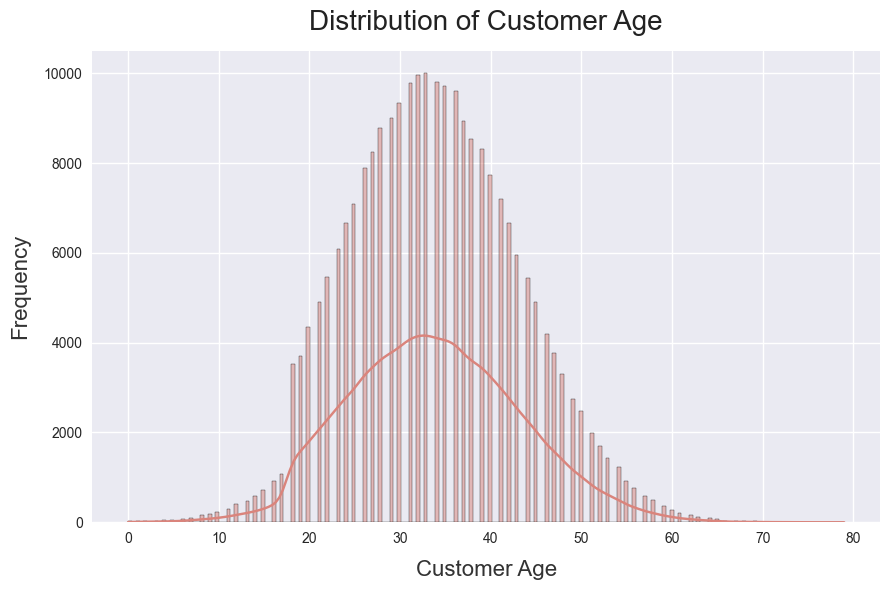

In [15]:
# Plot 3: Histogram for Customer.Age
plt.figure(figsize=(9,6))
sns.histplot(df['Customer.Age'].dropna(), kde=True, color='#DA847C')
plt.title('Distribution of Customer Age', pad=15, fontsize=20, color='#222222')
plt.xlabel('Customer Age', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Frequency', labelpad=10, fontsize=16, color='#333333')
plt.tight_layout()
plt.show()

Customer age distribution shows most customers are between 20-40 years old, with the highest frequency around 25-30 years.


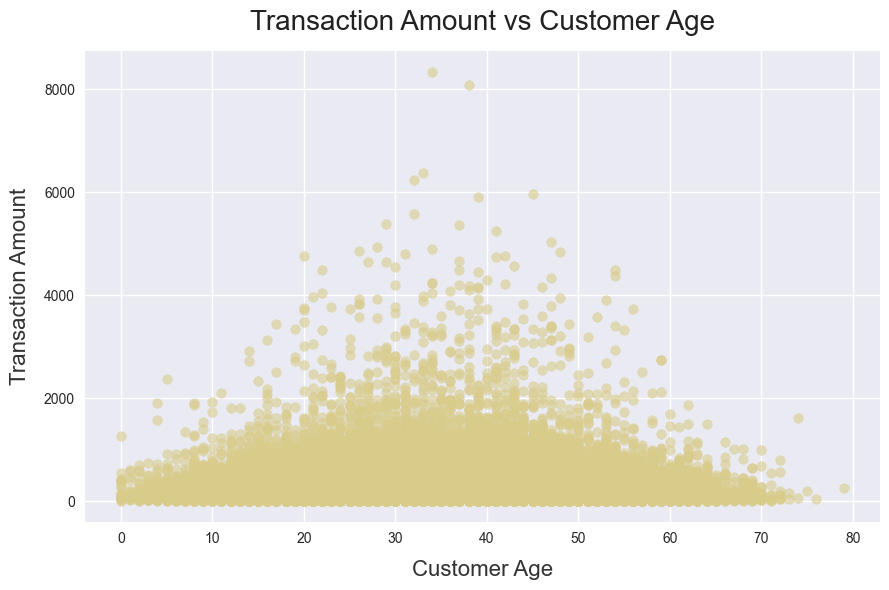

In [16]:
# Plot 4: Scatter plot - Transaction.Amount vs Customer.Age
plt.figure(figsize=(9,6))
plt.scatter(df['Customer.Age'], df['Transaction.Amount'], color='#D9CC8B', alpha=0.6)
plt.title('Transaction Amount vs Customer Age', pad=15, fontsize=20, color='#222222')
plt.xlabel('Customer Age', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Transaction Amount', labelpad=10, fontsize=16, color='#333333')
plt.tight_layout()
plt.show()

There's no strong correlation between customer age and transaction amount.

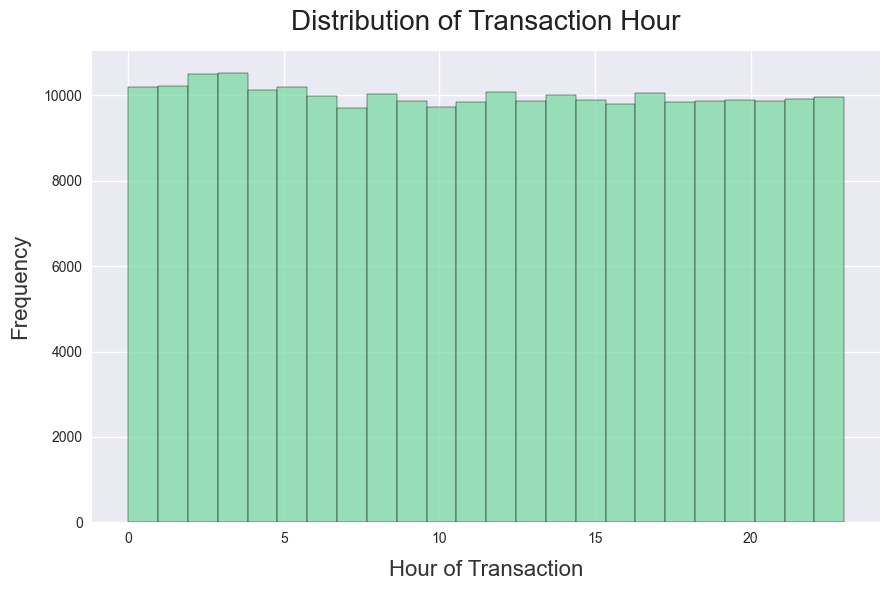

In [17]:
# Plot 5: Histogram for Transaction.Hour
plt.figure(figsize=(9,6))
sns.histplot(df['Transaction.Hour'].dropna(), bins=24, color='#7CD9A5')
plt.title('Distribution of Transaction Hour', pad=15, fontsize=20, color='#222222')
plt.xlabel('Hour of Transaction', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Frequency', labelpad=10, fontsize=16, color='#333333')
plt.tight_layout()
plt.show()

Transactions occur throughout the day with peaks during early morning hours indicating further research.

C:\Users\georg\AppData\Local\Temp\ipykernel_7064\1480745310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Payment.Method', y='Transaction.Amount', data=df, palette='Set2')


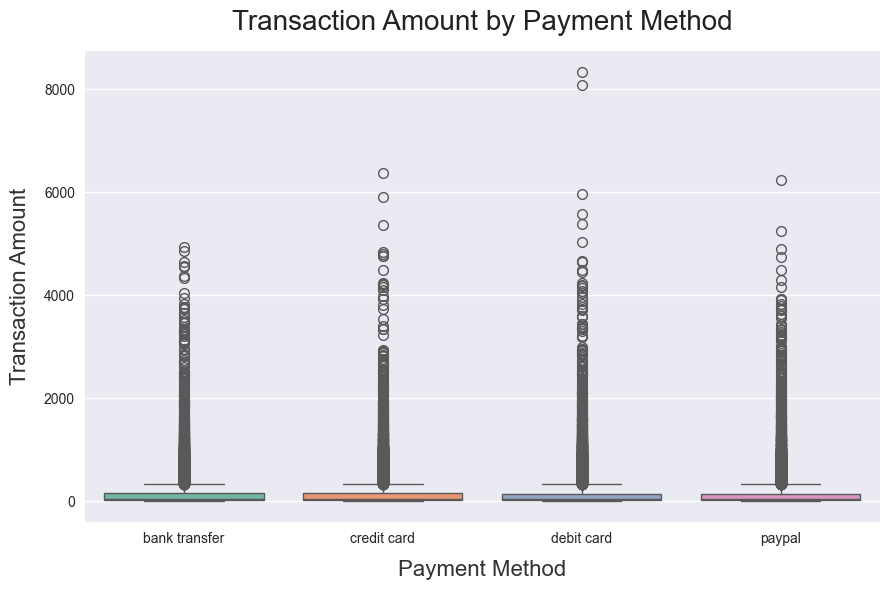

In [18]:
# Plot 6: Box plot for Transaction.Amount by Payment.Method
plt.figure(figsize=(9,6))
sns.boxplot(x='Payment.Method', y='Transaction.Amount', data=df, palette='Set2')
plt.title('Transaction Amount by Payment Method', pad=15, fontsize=20, color='#222222')
plt.xlabel('Payment Method', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Transaction Amount', labelpad=10, fontsize=16, color='#333333')
plt.tight_layout()
plt.show()

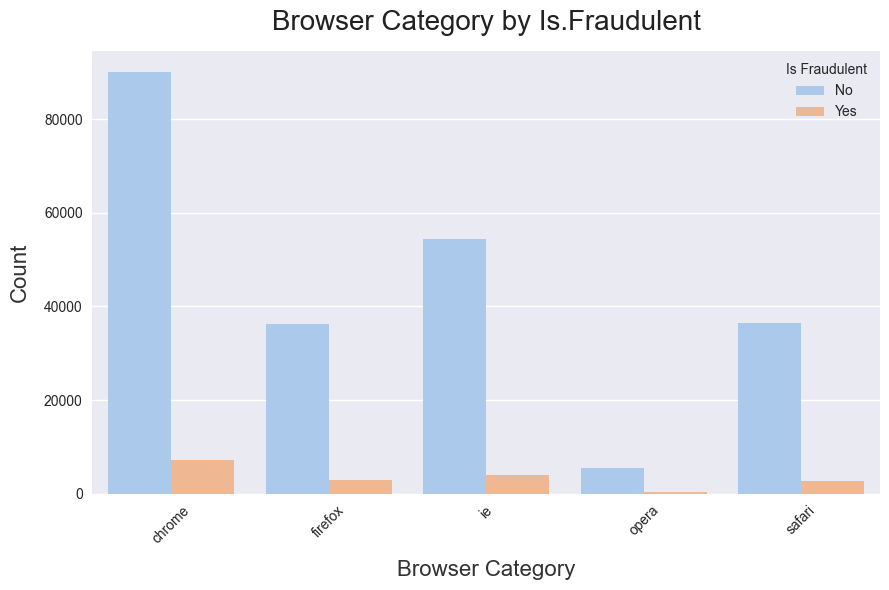

In [19]:
# Plot 7: Countplot for browser category by Is.Fraudulent
plt.figure(figsize=(9,6))
sns.countplot(x='browser', data=df, hue='Is.Fraudulent', palette='pastel')
plt.title('Browser Category by Is.Fraudulent', pad=15, fontsize=20, color='#222222')
plt.xlabel('Browser Category', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Count', labelpad=10, fontsize=16, color='#333333')
plt.xticks(rotation=45)
plt.legend(title="Is Fraudulent", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

The data suggests that fraudulent activities may vary across different browser categories, with chrome and ie potentially being more susceptible to fraud.

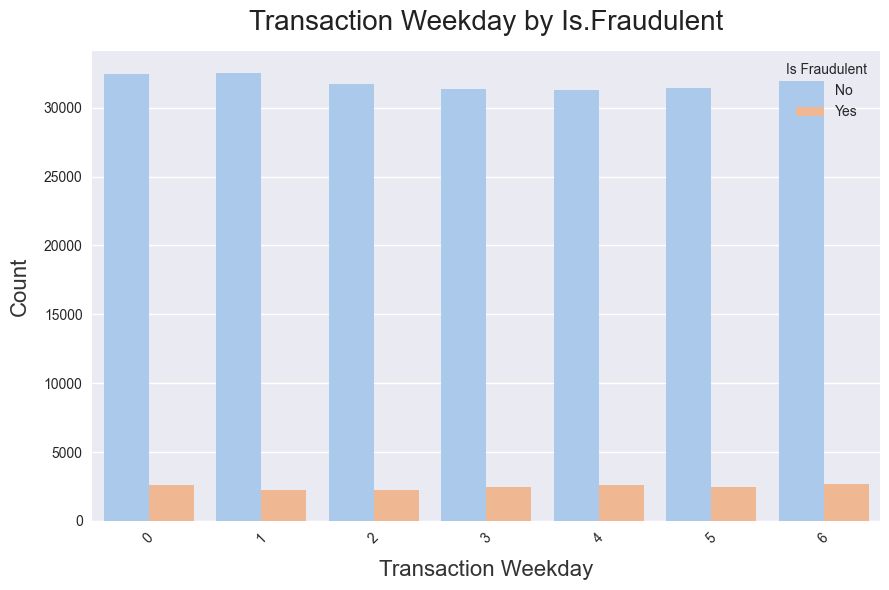

In [20]:
# Plot 8: Count plot for Transaction.Weekday by Is.Fraudulent
plt.figure(figsize=(9,6))
sns.countplot(x='Transaction.Weekday', data=df, hue='Is.Fraudulent', palette='pastel')
plt.title('Transaction Weekday by Is.Fraudulent', pad=15, fontsize=20, color='#222222')
plt.xlabel('Transaction Weekday', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Count', labelpad=10, fontsize=16, color='#333333')
plt.xticks(rotation=45)
plt.legend(title="Is Fraudulent", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

Fraudulent transactions appear to be distributed across weekdays, but weekends may have higher fraud occurrences.

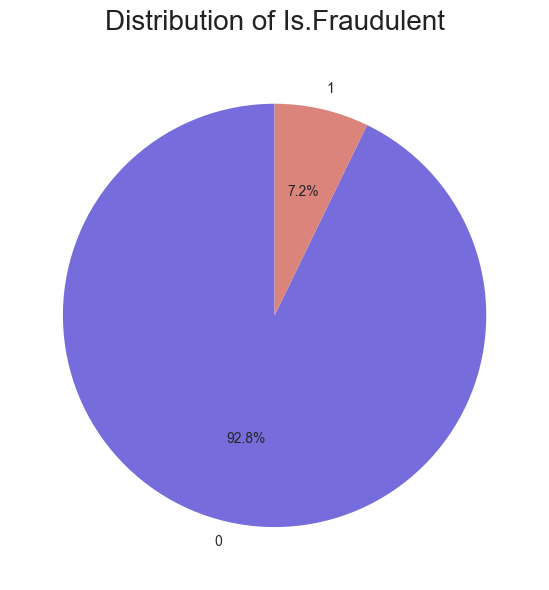

In [21]:
# Plot 9: Pie chart for Is.Fraudulent
plt.figure(figsize=(9,6))
df['Is.Fraudulent'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#766CDB', '#DA847C'], startangle=90)
plt.title('Distribution of Is.Fraudulent', pad=15, fontsize=20, color='#222222')
plt.ylabel('')
plt.tight_layout()
plt.show()


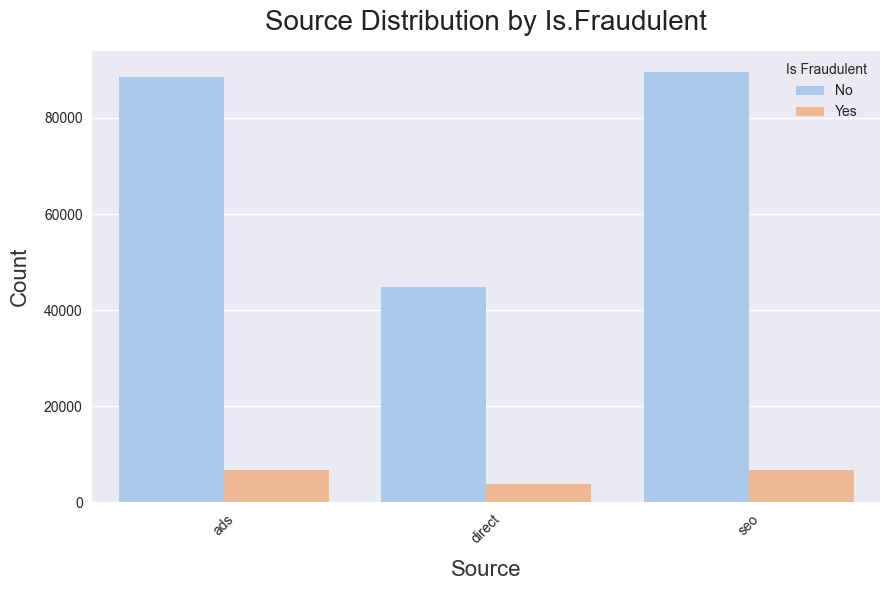

In [22]:
# Plot 10: Count plot for Source Distribution by Is.Fraudulent
plt.figure(figsize=(9,6))
sns.countplot(x='source', data=df, hue='Is.Fraudulent', palette='pastel')
plt.title('Source Distribution by Is.Fraudulent', pad=15, fontsize=20, color='#222222')
plt.xlabel('Source', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Count', labelpad=10, fontsize=16, color='#333333')
plt.xticks(rotation=45)
plt.legend(title="Is Fraudulent", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


The distribution of transactions across different sources shows varying levels of fraudulent activity. Ads and Seo may have higher instances of fraud.

C:\Users\georg\AppData\Local\Temp\ipykernel_7064\1838575799.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transaction.Season', y='Transaction.Amount', data=df, palette='husl')


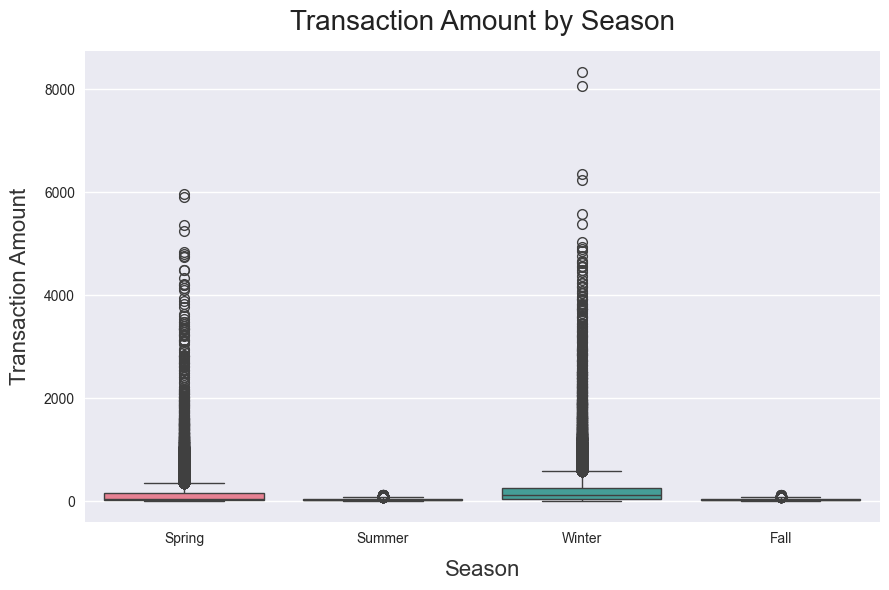

In [23]:
# Plot 11: Transaction Amount by Season
plt.figure(figsize=(9,6))
sns.boxplot(x='Transaction.Season', y='Transaction.Amount', data=df, palette='husl')
plt.title('Transaction Amount by Season', pad=15, fontsize=20, color='#222222')
plt.xlabel('Season', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Transaction Amount', labelpad=10, fontsize=16, color='#333333')
plt.tight_layout()
plt.show()

Transaction amounts fluctuate across different seasons, with winter and spring seasons potentially showing higher transaction values when compared with fall and summer.

C:\Users\georg\AppData\Local\Temp\ipykernel_7064\2059438343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transaction_Period', y='Transaction.Amount', data=df, palette='Set2')


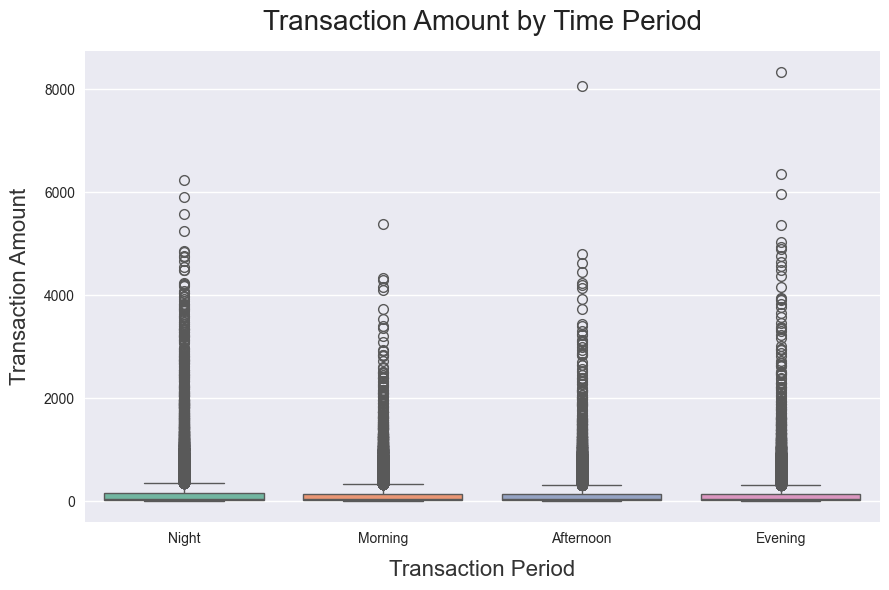

In [24]:
# Plot 12: Transaction Amount by Transaction Period
plt.figure(figsize=(9,6))
sns.boxplot(x='Transaction_Period', y='Transaction.Amount', data=df, palette='Set2')
plt.title('Transaction Amount by Time Period', pad=15, fontsize=20, color='#222222')
plt.xlabel('Transaction Period', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Transaction Amount', labelpad=10, fontsize=16, color='#333333')
plt.tight_layout()
plt.show()

Transaction amounts fluctuate across different time periods, with evening and night showing slightly higher transaction values when compared with afternoon and morning.

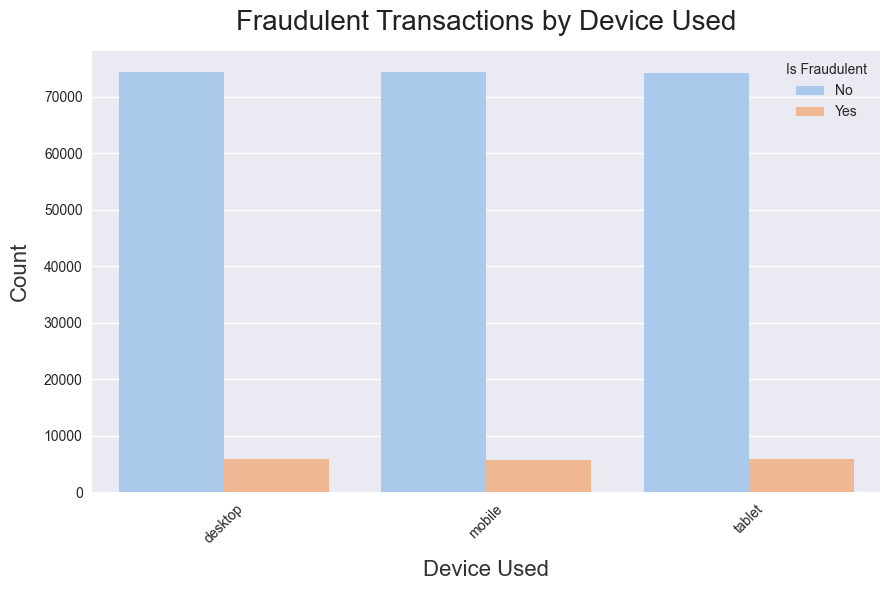

In [25]:
# Plot 13: Fraudulent Transactions by Device Used
plt.figure(figsize=(9,6))
sns.countplot(x='Device.Used', data=df, hue='Is.Fraudulent', palette='pastel')
plt.title('Fraudulent Transactions by Device Used', pad=15, fontsize=20, color='#222222')
plt.xlabel('Device Used', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Count', labelpad=10, fontsize=16, color='#333333')
plt.xticks(rotation=45)
plt.legend(title="Is Fraudulent", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

<Figure size 900x600 with 0 Axes>

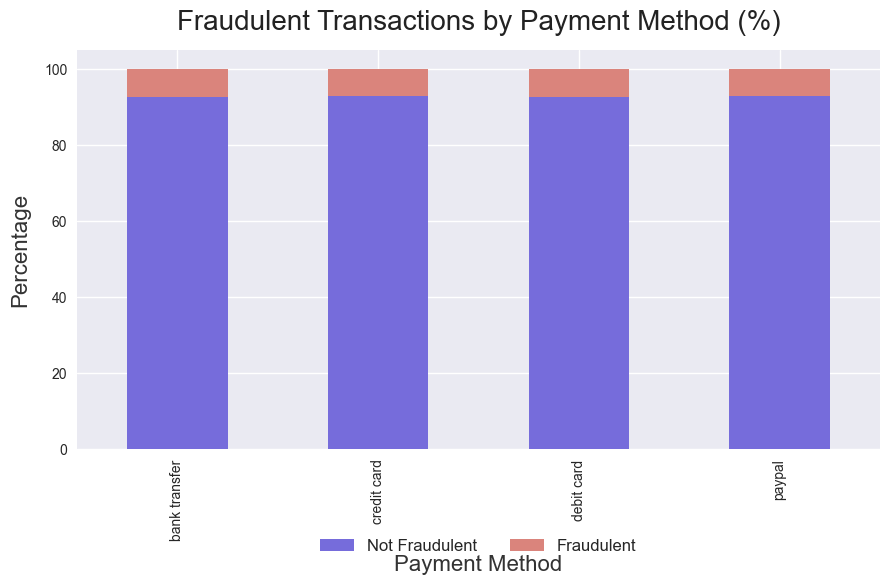

In [26]:
# Plot 14: Fraudulent Transactions by Payment Method (%)
plt.figure(figsize=(9,6))
fraud_payment = pd.crosstab(df['Payment.Method'], df['Is.Fraudulent'])
fraud_payment_pct = fraud_payment.div(fraud_payment.sum(1), axis=0) * 100
fraud_payment_pct.plot(kind='bar', stacked=True, figsize=(9,6), color=['#766CDB', '#DA847C'])
plt.title('Fraudulent Transactions by Payment Method (%)', pad=15, fontsize=20, color='#222222')
plt.xlabel('Payment Method', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Percentage', labelpad=10, fontsize=16, color='#333333')
plt.legend(['Not Fraudulent', 'Fraudulent'], loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2, fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\georg\AppData\Local\Temp\ipykernel_7064\3731480947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_weekend', y='Transaction.Amount', data=df, palette=['#7CD9A5', '#D9CC8B'])


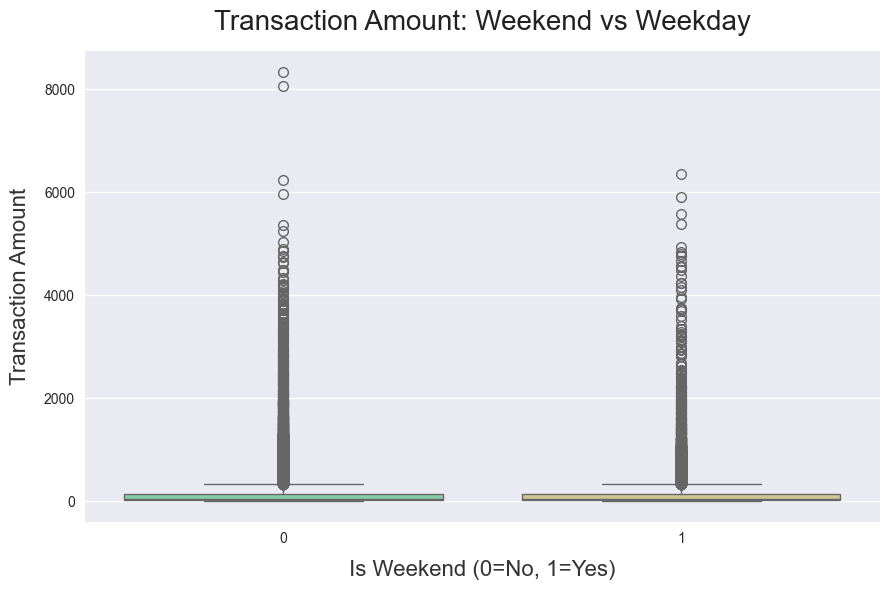

In [27]:
# Plot 15: Transaction Amount by Weekend vs Weekday
plt.figure(figsize=(9,6))
sns.boxplot(x='is_weekend', y='Transaction.Amount', data=df, palette=['#7CD9A5', '#D9CC8B'])
plt.title('Transaction Amount: Weekend vs Weekday', pad=15, fontsize=20, color='#222222')
plt.xlabel('Is Weekend (0=No, 1=Yes)', labelpad=10, fontsize=16, color='#333333')
plt.ylabel('Transaction Amount', labelpad=10, fontsize=16, color='#333333')
plt.tight_layout()
plt.show()


Transaction amounts on weekends and weekdays show distinct patterns, with potential differences in median values and variability.

**Label Encoding**

Handling Categorical column: Label Encoding

In [28]:
# Encode categorical variables using Label Encoding
categorical_cols = ["source", "browser", "Payment.Method", "Product.Category", "Device.Used", "Transaction.Season", "Transaction_Period"]
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    df[col] = df[col].astype(int)

Handling Age column: Creating age bins and label encoding

In [29]:
# Define age groups
age_bins = [0, 18, 25, 35, 50, 65, 100]  # Define bin edges
age_labels = ['0-18', '19-25', '26-35', '36-50', '51-65', '65+']  # Labels for bins

# Create a new column for age groups
df['Age.Group'] = pd.cut(df['Customer.Age'], bins=age_bins, labels=age_labels, right=False)

In [30]:
# Label Encoding to Age.Group
le = LabelEncoder()
df['Age.Group'] = le.fit_transform(df['Age.Group'])

print(df.head())

   Transaction.Amount  Customer.Age  Account.Age.Days  Transaction.Hour  \
0               45.00            37                35                11   
1               15.00            33                44                 3   
2               54.00            19                44                23   
3              234.42            23               107                17   
4              412.49            23               220                 8   

   source  browser  Payment.Method  Product.Category  Quantity  Device.Used  \
0       0        0               3                 1         5            2   
1       1        1               2                 2         5            2   
2       2        3               2                 2         1            1   
3       0        0               0                 1         5            2   
4       0        4               0                 4         4            1   

   ...  Transaction.Day  Transaction.Weekday  Transaction.Week  \
0  ...  

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Transaction.Amount     240000 non-null  float64
 1   Customer.Age           240000 non-null  int64  
 2   Account.Age.Days       240000 non-null  int64  
 3   Transaction.Hour       240000 non-null  int64  
 4   source                 240000 non-null  int32  
 5   browser                240000 non-null  int32  
 6   Payment.Method         240000 non-null  int32  
 7   Product.Category       240000 non-null  int32  
 8   Quantity               240000 non-null  int64  
 9   Device.Used            240000 non-null  int32  
 10  Is.Fraudulent          240000 non-null  int64  
 11  Transaction.Year       240000 non-null  int32  
 12  Transaction.Month      240000 non-null  int32  
 13  Transaction.Day        240000 non-null  int32  
 14  Transaction.Weekday    240000 non-nu

# **Modelling**

In [32]:
X = df.drop(columns=['Is.Fraudulent'])
y = df['Is.Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Decision Tree

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'classifier__class_weight': 'balanced'}
Train F1-score: 1.000
Test F1-score: 0.438
Test Accuracy: 0.916
Test ROC-AUC Score: 0.699

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     44463
           1       0.43      0.44      0.44      3537

    accuracy                           0.92     48000
   macro avg       0.69      0.70      0.70     48000
weighted avg       0.92      0.92      0.92     48000



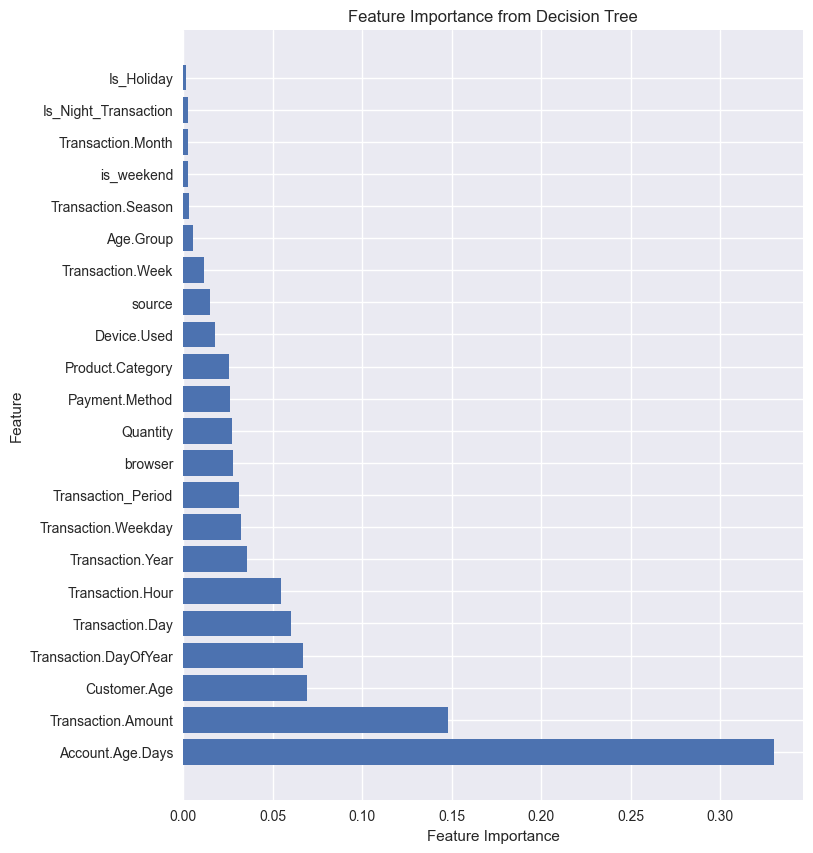

In [33]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

param_grid = {
    'classifier__class_weight': [{0: 1, 1: 5}, {0: 1, 1: 10}, 'balanced']
}

pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', DecisionTreeClassifier(random_state=18))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=cv, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_f1 = f1_score(y_train, y_pred_train)
test_f1 = f1_score(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"Train F1-score: {train_f1:.3f}")
print(f"Test F1-score: {test_f1:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Test ROC-AUC Score: {test_roc_auc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

import matplotlib.pyplot as plt

feature_importance = best_model.named_steps['classifier'].feature_importances_

sorted_idx = np.argsort(feature_importance)
feature_names = X_train.columns

plt.figure(figsize=(8, 10))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Decision Tree")
plt.gca().invert_yaxis()
plt.show()


- Light GBM

[LightGBM] [Info] Number of positive: 13745, number of negative: 178255
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1015
[LightGBM] [Info] Number of data points in the train set: 192000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.071589 -> initscore=-2.562540
[LightGBM] [Info] Start training from score -2.562540
[LightGBM] [Info] Number of positive: 13745, number of negative: 178255
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1015
[LightGBM] [Info] Number of data points in the train set: 192000, number of used features: 22
[LightGBM] [In

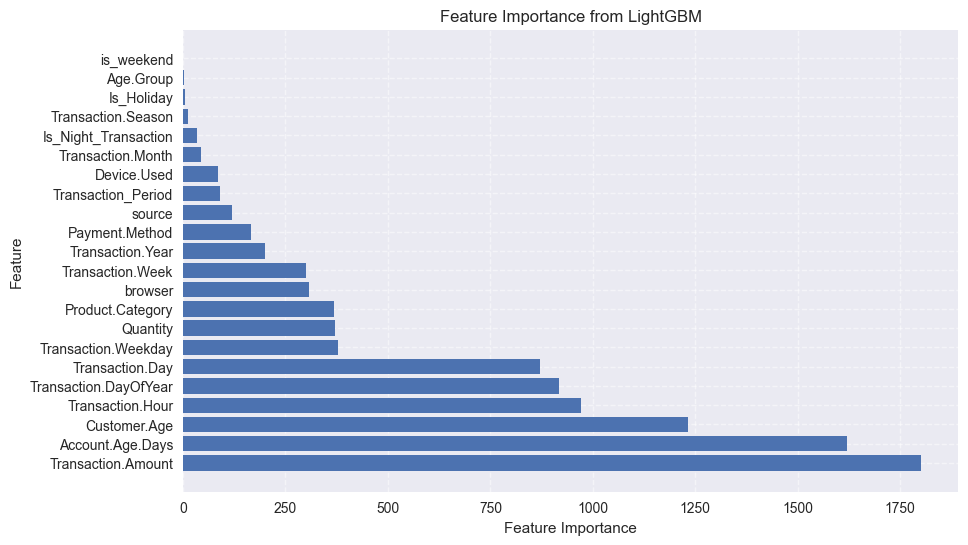

In [34]:
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, recall_score
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder
from imblearn.under_sampling import RandomUnderSampler

# Handle categorical columns if there is any
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

X_train[categorical_cols] = X_train[categorical_cols].astype("category")
X_test[categorical_cols] = X_test[categorical_cols].astype("category")

lgb_model = lgb.LGBMClassifier(objective='binary', random_state=42,is_unbalance=True)

param_grid = {
    'learning_rate': [0.001, 0.005, 0.01],
    'num_leaves': [50, 70, 100, 150],
    'max_depth': [10, 15, 20, -1],
    'min_child_samples': [1, 3, 5, 10],
    'min_split_gain': [0.0, 0.01, 0.05],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
    'subsample': [0.7, 0.9, 1.0],  # Only if you decide to remove explicit bagging settings
    'colsample_bytree': [0.7, 0.9, 1.0]
}


random_search = RandomizedSearchCV(
    lgb_model, param_grid, n_iter=10, scoring='recall', cv=5,
    n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

best_lgb = lgb.LGBMClassifier(
    **random_search.best_params_,
    random_state=42
)

best_lgb.fit(X_train, y_train)

y_pred_proba = best_lgb.predict_proba(X_test)[:, 1]

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]

y_pred_test = (y_pred_proba > best_threshold).astype(int)

print(f"Optimized Threshold: {best_threshold:.2f}")
print(f"Test F1-score: {f1_score(y_test, y_pred_test):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")
print(f"Test ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

plt.figure(figsize=(10, 6))
feature_importances = best_lgb.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(feature_importances)), np.array(X_train.columns)[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from LightGBM")
plt.gca().invert_yaxis()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


- XGBoost

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:55:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:55:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Optimized Threshold: 0.75
Test F1-score: 0.586
Test Accuracy: 0.950
Test ROC-AUC Score: 0.800

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     44463
           1       0.75      0.48      0.59      3537

    accuracy                           0.95     48000
   macro avg       0.85      0.73      0.78     48000
weighted avg       0.94      0.95      0.94     48000



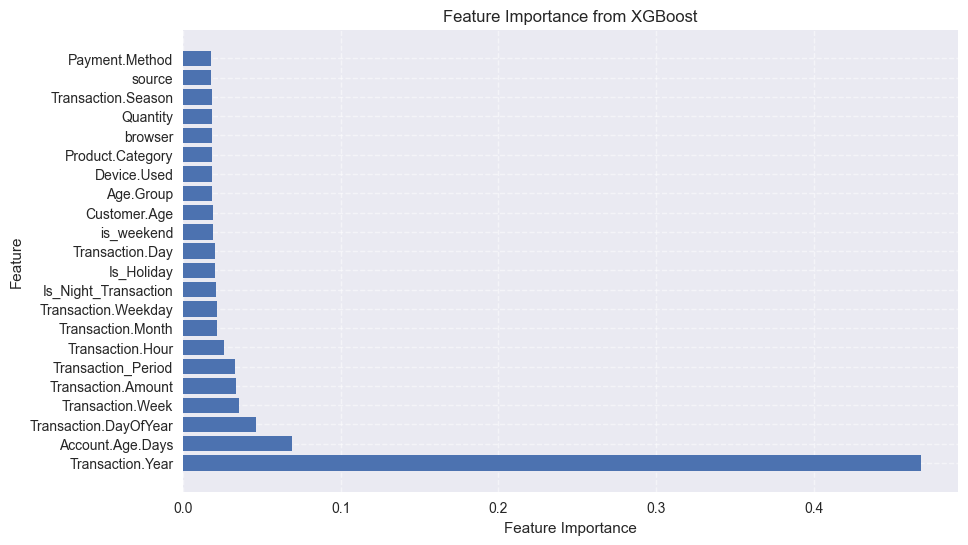

In [35]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, PolynomialFeatures
from imblearn.over_sampling import BorderlineSMOTE
# Handle categorical columns if there is any
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])


xgb_model = xgb.XGBClassifier(
    random_state=42, use_label_encoder=False, eval_metric='logloss', n_jobs=-1
)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9, 12],
    'n_estimators': [100, 200, 500, 1000],
    'min_child_weight': [1, 3, 5, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_lambda': [0, 0.1, 1, 10],
    'gamma': [0, 0.1, 0.5, 1]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    xgb_model, param_grid, n_iter=30, scoring='f1', cv=cv,
    verbose=1, n_jobs=-1, random_state=42
)

random_search.fit(X_train, y_train)

best_xgb = xgb.XGBClassifier(
    **random_search.best_params_,
    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],
    random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss'
)

best_xgb.fit(X_train, y_train)

y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0.1, 0.9, 50)
f1_scores = [f1_score(y_test, y_pred_proba > t) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]

y_pred_test = (y_pred_proba > best_threshold).astype(int)

print(f"Optimized Threshold: {best_threshold:.2f}")
print(f"Test F1-score: {f1_score(y_test, y_pred_test):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")
print(f"Test ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

plt.figure(figsize=(10, 6))
feature_importances = best_xgb.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(feature_importances)), np.array(X_train.columns)[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from XGBoost")
plt.gca().invert_yaxis()  # Top feature at the top
plt.grid(True, linestyle="--", alpha=0.5)  # Light grid for better visibility
plt.show()


- CatBoost

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Optimized Threshold: 0.79
Test F1-score: 0.591
Test Accuracy: 0.950
Test ROC-AUC Score: 0.817

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     44463
           1       0.75      0.49      0.59      3537

    accuracy                           0.95     48000
   macro avg       0.85      0.74      0.78     48000
weighted avg       0.94      0.95      0.95     48000



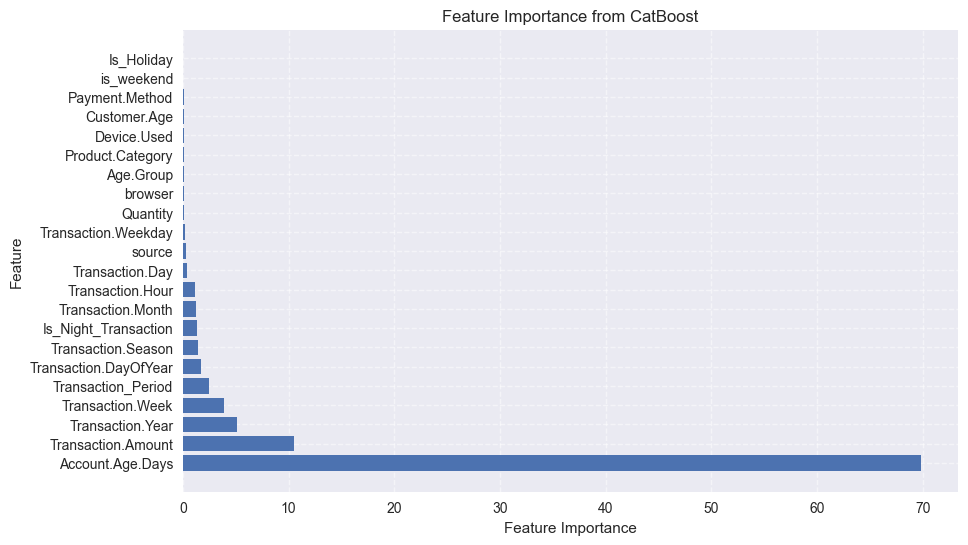

In [37]:
import numpy as np
import catboost as cb
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE

# Handle categorical columns if there is any
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])

cb_model = cb.CatBoostClassifier(
    random_state=42,
    verbose=0,  # Suppress detailed logging
    task_type="CPU"  # Change to "GPU" if available
)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'iterations': [100, 200, 500, 1000],
    'l2_leaf_reg': [1, 3, 5, 10],
    'border_count': [32, 64, 128],  # Number of splits for feature binning
    'bagging_temperature': [0.5, 1, 2]  # Controls randomness in sampling
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    cb_model, param_grid, n_iter=20, scoring='f1', cv=cv,
    verbose=1, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

best_cb = cb.CatBoostClassifier(
    **random_search.best_params_,
    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],
    random_state=42, verbose=0, task_type="CPU"
)

best_cb.fit(X_train, y_train)

y_pred_proba = best_cb.predict_proba(X_test)[:, 1]

thresholds = np.linspace(0.1, 0.9, 50)
f1_scores = [f1_score(y_test, y_pred_proba > t) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]

y_pred_test = (y_pred_proba > best_threshold).astype(int)

print(f"Optimized Threshold: {best_threshold:.2f}")
print(f"Test F1-score: {f1_score(y_test, y_pred_test):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")
print(f"Test ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

plt.figure(figsize=(10, 6))
feature_importances = best_cb.get_feature_importance()
sorted_idx = np.argsort(feature_importances)

plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(feature_importances)), np.array(X_train.columns)[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from CatBoost")
plt.gca().invert_yaxis()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()




*   Convolutional neural networks




In [38]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import numpy as np
from sklearn.model_selection import StratifiedKFold

# 1. Scale data using MinMaxScaler (better for neural networks)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2. Define CNN model with optimized architecture
def create_improved_model(input_shape, learning_rate=0.0005):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.1),  # Reduced dropout

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),

        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. Custom F1-score callback
class F1ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data, patience=3):
        super(F1ScoreCallback, self).__init__()
        self.validation_data = validation_data
        self.patience = patience
        self.best_f1 = 0
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        x_val, y_val = self.validation_data
        y_pred = np.round(self.model.predict(x_val))
        f1 = f1_score(y_val, y_pred)
        logs['val_f1'] = f1
        print(f" - val_f1: {f1:.4f}")

        if f1 > self.best_f1:
            self.best_f1 = f1
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.model.stop_training = True
                print(f"\nEarly stopping at epoch {epoch}")

# 4. K-Fold Cross-Validation (SMOTE Applied Inside)
n_splits = 3
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_f1_scores = []
cv_models = []
cv_thresholds = []

fold = 1
for train_idx, val_idx in skf.split(X, y):
    print(f"\nTraining fold {fold}/{n_splits}")

    # Apply SMOTE only on the training set to avoid leakage
    smote = SMOTE(random_state=42)
    X_train_fold, y_train_fold = smote.fit_resample(X_scaled[train_idx], y[train_idx])
    X_val_fold, y_val_fold = X_scaled[val_idx], y[val_idx]

    # Initialize model
    model = create_improved_model(X_train_fold.shape[1])

    f1_callback = F1ScoreCallback(validation_data=(X_val_fold, y_val_fold))

    early_stopping = EarlyStopping(monitor='val_f1', mode='max', patience=2, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)

    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=30,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, reduce_lr, f1_callback],
        verbose=1
    )

    y_pred_proba = model.predict(X_val_fold)

    # 5. Find the best classification threshold (Expanded Range)
    thresholds = np.arange(0.1, 0.9, 0.01)
    best_f1, best_threshold = 0, 0.5

    for threshold in thresholds:
        y_pred = (y_pred_proba > threshold).astype(int)
        fold_f1 = f1_score(y_val_fold, y_pred)

        if fold_f1 > best_f1:
            best_f1 = fold_f1
            best_threshold = threshold

    y_pred = (y_pred_proba > best_threshold).astype(int)
    fold_accuracy = accuracy_score(y_val_fold, y_pred)
    fold_precision = precision_score(y_val_fold, y_pred)
    fold_recall = recall_score(y_val_fold, y_pred)
    fold_f1 = f1_score(y_val_fold, y_pred)
    fold_auc = roc_auc_score(y_val_fold, y_pred_proba)

    print(f"Fold {fold} results with threshold {best_threshold:.2f}:")
    print(f"  Accuracy: {fold_accuracy:.4f}")
    print(f"  Precision: {fold_precision:.4f}")
    print(f"  Recall: {fold_recall:.4f}")
    print(f"  F1 Score: {fold_f1:.4f}")
    print(f"  AUC: {fold_auc:.4f}")

    cv_f1_scores.append(fold_f1)
    cv_models.append(model)
    cv_thresholds.append(best_threshold)

    fold += 1

# 6. Select the Best Model Based on F1 Score
best_model_idx = np.argmax(cv_f1_scores)
best_model = cv_models[best_model_idx]
best_threshold = cv_thresholds[best_model_idx]
print(f"\nBest model from fold {best_model_idx + 1} with F1 score: {cv_f1_scores[best_model_idx]:.4f}")

# 7. Final Evaluation on Test Set
X_test_scaled = scaler.transform(X_test)
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = (y_pred_proba > best_threshold).astype(int)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_auc = roc_auc_score(y_test, y_pred_proba)

print("\nFinal Test Results:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  F1 Score: {test_f1:.4f}")
print(f"  AUC: {test_auc:.4f}")



Training fold 1/3
Epoch 1/30


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  94/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step s/step - accuracy: 0.7013 - loss: 0.5520   

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step
 - val_f1: 0.3650
9280/9280 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7015 - loss: 0.5518 - val_accuracy: 0.8553 - val_loss: 0.4639 - learning_rate: 5.0000e-04 - val_f1: 0.3650
Epoch 2/30
 243/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step accuracy: 0.7459 - loss: 0.4803

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step
 - val_f1: 0.3143
9280/9280 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7459 - loss: 0.4803 - val_accuracy: 0.8079 - val_loss: 0.4564 - learning_rate: 5.0000e-04 - val_f1: 0.3143
Epoch 3/30
 162/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step accuracy: 0.7514 - loss: 0.4714

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step
 - val_f1: 0.3700
9280/9280 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7514 - loss: 0.4714 - val_accuracy: 0.8604 - val_loss: 0.4144 - learning_rate: 5.0000e-04 - val_f1: 0.3700
Epoch 4/30
 233/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step accuracy: 0.7562 - loss: 0.4651

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step
 - val_f1: 0.3172
9280/9280 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7562 - loss: 0.4651 - val_accuracy: 0.8077 - val_loss: 0.4770 - learning_rate: 5.0000e-04 - val_f1: 0.3172
Epoch 5/30
 247/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step accuracy: 0.7584 - loss: 0.4622

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step
 - val_f1: 0.3356
9280/9280 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7584 - loss: 0.4622 - val_accuracy: 0.8308 - val_loss: 0.4320 - learning_rate: 5.0000e-04 - val_f1: 0.3356
Epoch 6/30
9280/9280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7628 - loss: 0.4580
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
 242/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step
 - val_f1: 0.2991

Early stopping at epoch 5
9280/9280 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7628 - loss: 0.4580 - val_accuracy: 0.7903 - val_loss: 0.4561 - learning_rate: 5.0000e-04 - val_f1: 0.2991
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step
Fold 1 results with threshold 0.85:
  Accuracy: 0.9515
  Precision: 0.8140
  Recall: 0.4224
  F1 Score: 0.5562
  AUC: 0.7831

Training fold 2/3
Epoch 1/30


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 219/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step accuracy: 0.7009 - loss: 0.5482

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step
 - val_f1: 0.3872
9280/9280 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7009 - loss: 0.5481 - val_accuracy: 0.8712 - val_loss: 0.4591 - learning_rate: 5.0000e-04 - val_f1: 0.3872
Epoch 2/30
 232/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step accuracy: 0.7420 - loss: 0.4837

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step
 - val_f1: 0.3494
9280/9280 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7420 - loss: 0.4837 - val_accuracy: 0.8417 - val_loss: 0.4466 - learning_rate: 5.0000e-04 - val_f1: 0.3494
Epoch 3/30
 229/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step accuracy: 0.7483 - loss: 0.4741

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step
 - val_f1: 0.3337
9280/9280 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7483 - loss: 0.4741 - val_accuracy: 0.8311 - val_loss: 0.4319 - learning_rate: 5.0000e-04 - val_f1: 0.3337
Epoch 4/30
 225/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step accuracy: 0.7535 - loss: 0.4681

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step
 - val_f1: 0.3189

Early stopping at epoch 3
9280/9280 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7535 - loss: 0.4681 - val_accuracy: 0.8133 - val_loss: 0.4549 - learning_rate: 5.0000e-04 - val_f1: 0.3189
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step
Fold 2 results with threshold 0.88:
  Accuracy: 0.9506
  Precision: 0.7746
  Recall: 0.4421
  F1 Score: 0.5629
  AUC: 0.7868

Training fold 3/3
Epoch 1/30


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 111/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step s/step - accuracy: 0.6986 - loss: 0.5518

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step
 - val_f1: 0.4254
9280/9280 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.6987 - loss: 0.5517 - val_accuracy: 0.8938 - val_loss: 0.4201 - learning_rate: 5.0000e-04 - val_f1: 0.4254
Epoch 2/30
 231/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step accuracy: 0.7424 - loss: 0.4846

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step
 - val_f1: 0.3417
9280/9280 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7424 - loss: 0.4846 - val_accuracy: 0.8324 - val_loss: 0.4579 - learning_rate: 5.0000e-04 - val_f1: 0.3417
Epoch 3/30
 230/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step accuracy: 0.7487 - loss: 0.4759

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step
 - val_f1: 0.3812
9280/9280 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7487 - loss: 0.4759 - val_accuracy: 0.8650 - val_loss: 0.4163 - learning_rate: 5.0000e-04 - val_f1: 0.3812
Epoch 4/30
 208/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step accuracy: 0.7532 - loss: 0.4712

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step
 - val_f1: 0.3366

Early stopping at epoch 3
9280/9280 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7532 - loss: 0.4712 - val_accuracy: 0.8242 - val_loss: 0.4440 - learning_rate: 5.0000e-04 - val_f1: 0.3366
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step
Fold 3 results with threshold 0.87:
  Accuracy: 0.9520
  Precision: 0.8003
  Recall: 0.4445
  F1 Score: 0.5716
  AUC: 0.7968

Best model from fold 3 with F1 score: 0.5716
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step

Final Test Results:
  Accuracy: 0.9513
  Precision: 0.8043
  Recall: 0.4473
  F1 Score: 0.5749
  AUC: 0.8158


- Ensemble

Optimal Threshold: 0.56
Test F1-score: 0.595
Test Accuracy: 0.951
Test ROC-AUC Score: 0.813

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     44463
           1       0.75      0.49      0.60      3537

    accuracy                           0.95     48000
   macro avg       0.86      0.74      0.78     48000
weighted avg       0.95      0.95      0.95     48000



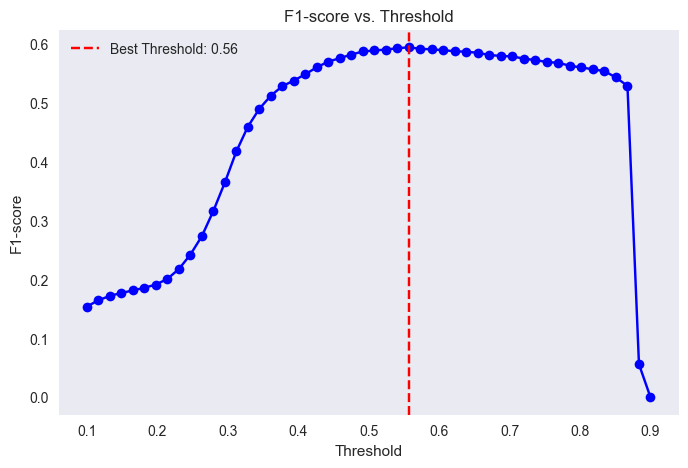

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_recall_curve

y_pred_lgb = best_lgb.predict_proba(X_test)[:, 1]
y_pred_xgb = best_xgb.predict_proba(X_test)[:, 1]
y_pred_cb = best_cb.predict_proba(X_test)[:, 1]

y_pred_ensemble_proba = (y_pred_lgb + y_pred_xgb + y_pred_cb) / 3

thresholds = np.linspace(0.1, 0.9, 50)
f1_scores = [f1_score(y_test, y_pred_ensemble_proba > t) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Optimal Threshold: {best_threshold:.2f}")

y_pred_ensemble = (y_pred_ensemble_proba > best_threshold).astype(int)

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print(f"Test F1-score: {f1_score(y_test, y_pred_ensemble):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_ensemble):.3f}")
print(f"Test ROC-AUC Score: {roc_auc_score(y_test, y_pred_ensemble_proba):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_ensemble))

plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, marker="o", linestyle="-", color="b")
plt.axvline(x=best_threshold, color="r", linestyle="--", label=f"Best Threshold: {best_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.title("F1-score vs. Threshold")
plt.legend()
plt.grid()
plt.show()


Once you have completed your analysis and are ready to submit the assessment you should export the trained model file (**only one model will be accepted**). The model file should be saved as a pickle file (.pkl). The model file should be saved in the same directory as the notebook. Once you have saved the model file you should upload both the notebook and the model file to the assessment submission portal. Please ensure you provide the model file name as a variable, see example below.

In [40]:
## Do not delete this cell ##

# export the model with pickle
import pickle

# save the model to disk

# define the filename, it should have a .pkl extension
filename = 'lgb_model.pkl' # replace 'log_reg_model' with the name of your model variable

# save the model to the current directory
with open(filename, "wb") as f:
    pickle.dump(best_lgb, f) # replace 'log_reg_model' with the name of your model variable


# Assessment Evaluation

This is required for the assessment to be marked. Groups should specify any data processing steps that are required to run the model in the cell below. This may include the installation of additional libraries, loading of the data, and any additional processing steps required to run the model. The model should be saved to a file called 'model.pkl' in the same directory as the notebook. The model file should be loaded and tested in the cell below to ensure it runs correctly. The model should be loaded and tested using the following code:

In [ ]:
## Do not delete this cell ##

# load the evaluation data
import pandas as pd

# load the raw data
df = pd.read_csv('evaluation_dataset.csv')



In [42]:
# groups should add the necessary preprocessing steps to prepare the data for evaluation below

# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, recall_score
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import TargetEncoder
from imblearn.under_sampling import RandomUnderSampler


# Remove whitespace in text columns
text_columns = ['source', 'browser', 'Payment.Method', 'Product.Category', 'Device.Used']
for col in text_columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Change data type of categorical columns
category_mapping = {col: sorted(df[col].unique()) for col in text_columns}
for column, categories in category_mapping.items():
    df[column] = pd.Categorical(df[column], categories=categories, ordered=True)

# Change the data type of the 'Transaction.Date' column to date
df['Transaction.Date'] = pd.to_datetime(df['Transaction.Date'], format='mixed')
df['Transaction.Date'] = df['Transaction.Date'].dt.strftime('%Y-%m-%d')

# Change the negative values in the age column to the median age
median_age = df[df['Customer.Age'] >= 0]['Customer.Age'].median()
df.loc[df['Customer.Age'] < 0, 'Customer.Age'] = median_age


#Feature Engineering

# Ensure 'Transaction.Date' is in datetime format
df['Transaction.Date'] = pd.to_datetime(df['Transaction.Date'], format='%Y-%m-%d', errors='coerce')
# Extract useful time-based features
df["Transaction.Year"] = df["Transaction.Date"].dt.year
df["Transaction.Month"] = df["Transaction.Date"].dt.month
df["Transaction.Day"] = df["Transaction.Date"].dt.day
df["Transaction.Weekday"] = df["Transaction.Date"].dt.weekday
df["Transaction.Week"] = df["Transaction.Date"].dt.isocalendar().week  #Extracting week of the year for seasonal analysis
df["Transaction.Week"] = df["Transaction.Week"].astype(int) # Convert 'Transaction.Week' to int data type
df["Transaction.DayOfYear"] = df["Transaction.Date"].dt.dayofyear  #Extracting day of the year for capturinng annual trends such as holiday shopping

# Create holiday feature to flag if transaction happened on public holiday
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=df["Transaction.Date"].min(), end=df["Transaction.Date"].max())
df["Is_Holiday"] = df["Transaction.Date"].isin(holidays).astype(int)

# Create a Boolean feature to determine the presence of weekends through the weekday raw data
df['is_weekend'] = df['Transaction.Weekday'].apply(lambda x: 1 if x in [5, 6] else 0)

# Create season encoding
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"
df["Transaction.Season"] = df["Transaction.Month"].apply(assign_season)

# Flag Transactions at Unusual Hours
df['Is_Night_Transaction'] = df['Transaction.Hour'].apply(lambda x: 1 if (x < 6 or x > 22) else 0)

# Transaction Hour Binning (Morning, Afternoon, Evening, Night)
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['Transaction_Period'] = pd.cut(df['Transaction.Hour'], bins=bins, labels=labels, right=False)

# Drop the original date column
df.drop(columns=["Transaction.Date"], inplace=True)


# Encode categorical variables using Label Encoding
categorical_cols = ["source", "browser", "Payment.Method", "Product.Category", "Device.Used", "Transaction.Season", "Transaction_Period"]
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    df[col] = df[col].astype(int)


# Define age groups
age_bins = [0, 18, 25, 35, 50, 65, 100]  # Define bin edges
age_labels = ['0-18', '19-25', '26-35', '36-50', '51-65', '65+']  # Labels for bins

# Create a new column for age groups
df['Age.Group'] = pd.cut(df['Customer.Age'], bins=age_bins, labels=age_labels, right=False)

# Label Encoding to Age.Group
le = LabelEncoder()
df['Age.Group'] = le.fit_transform(df['Age.Group'])

# the final dataset should be saved in a DataFrame called df_eval
df_eval = df.copy()

In [ ]:
## Do not delete this cell ##
from sklearn.metrics import f1_score, precision_recall_curve
from sklearn.metrics import precision_recall_curve

# Load the model and evaluate it on the evaluation data
filename = 'lgb_model.pkl'
# load the pickle model
with open(filename, "rb") as f:
    eval_model = pickle.load(f) # do not change the name of the model variable

y_eval = eval_model.predict_proba(df_eval.drop('Is.Fraudulent', axis=1))[:, 1]

precisions, recalls, thresholds = precision_recall_curve(df_eval['Is.Fraudulent'], y_eval)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]

y_pred = (y_eval > best_threshold).astype(int)

# calculate the f1 score
f1_eval = f1_score(df_eval['Is.Fraudulent'], y_pred)

# print the f1 score
print(f'F1 Score: {f1_eval:.3f}')

# **Reflective Summary**

### **A justification for implementing any preprocessing techniques:**

**Data Cleaning:**
1. Handling Text columns - Removed leading and trailing whitespaces and converted text to lowercase for consistency

2. Handling Date column - Converted 'Transaction.Date' to date format to allow feature engineering and for further analysis of the data

3. Handling negative values in the age column: We have updated the negative values in the column to median age as it keeps all transaction details intact without any bias.

4. Handling missing values: If there are any missing values in the dataset, the missing values in the 'Transaction.Amount' column are filled with the median amount, while the respective mode values are used to fill missing values in the 'categorical' and 'Is.Fraudulent' columns.


**Feature Engineering:**
Extracted useful time-based features from the 'Transaction.Date' and 'Transaction.Hour' column to help identify fraud patterns based on transaction timing.

**Label Encoding:**
Label encoding was used for categorical and Age.Group column since machine learning models require numerical input. Each unique category is assigned an integer label.















### **Model selections and performance evaluations (Why did you choose specific models, Were they effective, etc?):**


**Part 1: Model Selection**

* Decision Tree: In our initial submission, we selected a Decision Tree as our
baseline model, achieving a test F1 score of 0.54. We found this suitable as a baseline due to the models interpretability and relatively high predictive performance compared to other non-boosting methods.

**Part 2: Model Selection**

- LightGBM: After our first submission, we realized that the pickled model had fixed data inputs from the training process. Due to the randomness introduced by dropping columns in one-hot encoding, we opted for label encoding to maintain consistency between training and evaluation. We trained multiple models, including Decision Tree, LightGBM, XGBoost, CatBoost, and an ensemble of the latter three (as they outperformed others). Ultimately, we selected LightGBM as our improved model, which improved to 0.59 f1 score on the test set.

- Techniques Used:

    * Hyperparameter Tuning: We performed random search, selecting 10 random candidates from our parameter grid. Since the F1 score and recall for class 1 were relatively low, we prioritized recall as our scoring metric. To deal with imbalanced target column, we use parameter is_unbalance=True built in the light GBM pacakage.
    * Threshold Optimization: To optimize the threshold for class 1 predictions, we identified the point that maximized the F1 score on the precision-recall curve and applied this threshold to our probability predictions.

### **A reflection on the groups approach to addressing the data mining task, key takeaways and potential improvements for the future:**

The group followed a structured process for fraud detection, including data preprocessing, feature engineering, and model training. Steps included:

**Data Preprocessing**: Cleaning missing values, converting categorical features, and handling outliers.

**Feature Engineering**: Extracting date-based insights and encoding categorical variables.

**Model Training & Tuning**: Using LightGBM with Randomized Search CV and StratifiedKFold to optimize performance.

**Optimization**: Identifying the best classification threshold using precision-recall curves to balance recall and precision.

##### **Key Takeways**

**Effective Workflow**: Logical steps from data cleaning to model evaluation.

**Handling Imbalanced Data**: is_unbalance=True in LightGBM helped optimize fraud detection.

**Feature Engineering**: Proper encoding and transformation of time-based features improved model performance.

**Hyperparameter Tuning**: Enhanced accuracy and recall through systematic tuning.

##### **Potential Improvements**
**Enhanced Data Exploration:** More visual analysis (e.g., fraud patterns by time or transaction type) could offer deeper insights.

**Deployment Considerations:** Exploring real-time fraud detection strategies could improve practical application.

**Expand Model Selection:** Testing more model in the baseline process could give us more guidance in the model selection part. Now we only focus on boosting method and explore less than 10 models.

**Greedy Tuning:** Due to time consuming tuning process, we used random search as our tuning method. However, grid search would be more effective but less efficient to find the optimised parameters.

**Resampling:** Because after oversampling or undersampling test, the model performance did not improve. Thus we did not apply this method. But proper used of resampling could deal with the imbalanced dataset.

# **Contribution Statement**:

Data Preprocessing and Feature Engineering done by:
*   Ashika Sreekanta Naik - 24200775
*   Vaishnavi Manjunath - 24207355

Exploratory Data Analysis done by:
*   Muntazir Mehdi Ejaz Husain Syed - 24207265

Modelling done by:
*   Guozhi Wang - 24202446
*   Alison Wambui Kuria - 24281898



